# **Word2Vec Word Embeddings**

## Abstract

Word2Vec is a family of model architectures, proposed by Google's [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781) paper in 2013, that can be used to efficiently learn word embeddings from large datasets. 

This notebook aims to provide a background about the state of language representation at the time and explore the Word2Vec paper and its implementations.

>[Word2Vec](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=1mo_OS8fVeEV)

>>[Abstract](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=K_N_isQ2VpSZ)

>>[Introduction](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=5LRNpGBQ7Er7)

>>[Localist Representation of Words Meaning](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=4a4yAebkYI9F)

>>[Distributed Representation of Words Meaning](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=cGZ-J5-zaIaI)

>>>[The Distributional Hypothesis](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=cGZ-J5-zaIaI)

>>>[Word Vectors/Embeddings](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=cGZ-J5-zaIaI)

>>>[Neural Language Models](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=cGZ-J5-zaIaI)

>>>[Self-Supervision](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=cGZ-J5-zaIaI)

>>[Word2Vec](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=ALC1VKFfVrts)

>>>[Core Idea](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=vDcwzK0Gnr1Q)

>>>[Continuous Bag-of-Words and Continuous Skip-gram Models](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=_oyGp4cdmtjM)

>>>[Objective Function](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=UHmaxXB3nmWx)

>>>[Negative Sampling](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=hiykQCw4qH_D)

>>[Tensorflow's Word2Vec Implementation](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=2UPUR59b1a6f)

>>[Gensim's Word2Vec Implementation](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=Krheb-893tDr)

>>[Pretrained Word2Vec Model](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=u9biShuDOZvm)

>>[References](#folderId=1qdAMa4xF_ad9dorIYgjgJG2KFoc2vfb3&updateTitle=true&scrollTo=nPM1YWVmkKba)



## Introduction

Language Representation refers to the numerical encoding of natural language, which is an essential step in any NLP pipeline as machine learning methods only deal with numeric entites. For instance, neural networks only accept vectorized inputs. Thus, when processing images, they can be represented as flattened one-dimensional vectors of all their pixel values. This encoding creates a vector space where similar images have similar corresponding vectors. The figure below shows that increasing the brightness of an image, results in the same vector of the original image with a larger magnitude.




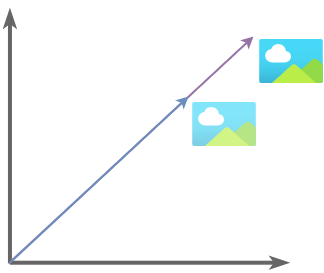

Similarly, the goal of language representation is to encode natural language (terms or documents) in a vector space where similar vectors correspond to similar pieces of text, as shown in the figure below.

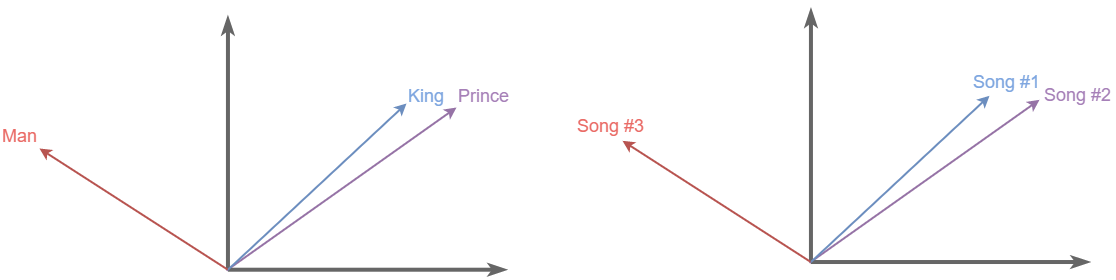

## Localist Representation of Words Meaning

The problem with traditional NLP approaches to implementing “meaning” is that words are regarded, and represented, as discrete/atomic units, such as one-hot encoded word vectors. 

There are two main issues with this approach:
- Vectors Efficiency

  The vectors’ lengths are equal to the number of words in our vocabulary (curse of dimensionality).
- Vectors Orthogonality

  There isn’t a natural notion of similarity between one-hot encoded vectors (curse of orthogonality). 

Therefore, the goal is to densly encode words in a multidimensional semantic vector space that satisfies the two following criteria:
- Its dimensions are reasonably limited.
- It possesses a natural notion of similarity between vectors.




## Distributed Representation of Words Meaning

### The Distributional Hypothesis

The distributional hypothesis suggests that the more semantically similar two words are, the more distributionally similar they will be, and consequently, the more they will tend to occur in similar linguistic contexts.

### Word Vectors/Embeddings

This idea of distributional semantics, which is the notion that a word’s meaning is given by the words that frequently appear close by, is exploited to produce word embeddings that encode similarity in the vectors themselves.

> “You shall know a word by the company it keeps.”

When a word $w$ appears in a text, its context is the set of words that appear nearby, within a fixed-sized window. Thus, by representing context words as vectors, a dense real-valued vector can be built up for each word, chosen so that it is similar to vectors of words that appear in similar contexts, and thus represents the meaning of that word by way of distributional semantics. 

### Neural Language Models

Representation of words as continuous vectors has a long history. A very popular model architecture for estimating neural network language model ([NNLM](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)) was proposed in 2003 by Bengio et al. at the University of Montreal, where a feedforward neural network with a linear projection layer and a non-linear hidden layer was used to learn jointly the word vector representation and a statistical language model. This work has been followed by many others.

These models learn simultaneously:
- A distributed representation for each word.
- The probability function for word sequences.

Generalization is obtained because a sequence of words that has never been seen before gets high probability if it is made of words that are similar (in the sense of having a nearby representation) to words forming an already seen sentence. After the model training, the learned weights are saved as the word-embeddings. 

### Self-Supervision

The revolutionary intuition here is the use of running text as implicitly  supervised training data for such a classifier. This method, often called self-supervision, avoids the need for any hand-labelled supervision signal. This idea was first proposed in the task of neural language modelling when Bengio et al. (2003) showed that a neural language model (a neural network that learned to predict the next word from previous ones) could use the next word in running text as its supervision signal, and could be used to learn an embedding representation for each word as part of doing this prediction task.



## Word2Vec

The [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781) paper was published by Google in 2013. The paper proposed two novel model architectures for efficiently computing continuous vector representations of words from very large data sets. 

Word2Vec is much simpler than the neural network language model (Bengio et al. 2003) in two ways:

- First, word2vec simplifies the prediction task (making it binary classification instead of vocabulary softmax prediction).  This is achieved by negative sampling instead of applying a softmax layer, which is computationally more expensive.

- Second, word2vec simplifies the architecture (training a logistic regression classifier instead of a multi-layer neural network with hidden layers that demand more sophisticated training algorithms).

Thus, word2vec models are shallow, two-layer neural networks, trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in it. 

Word vectors are positioned in the vector space such that words that share similar contexts in the corpus are located close to one another in the semantic space.



### Core Idea

- Large corpus of text.
- Every word in a vocabulary is represented by a vector.
- Iterate over all positions $t$ in the text, which has a centre word $c$ and context words $o$.
  
  Use the similarity of the word vectors for $c$ and $o$ to compute the probability of one given the other.

- Keep adjusting the word vectors to maximize this probability.


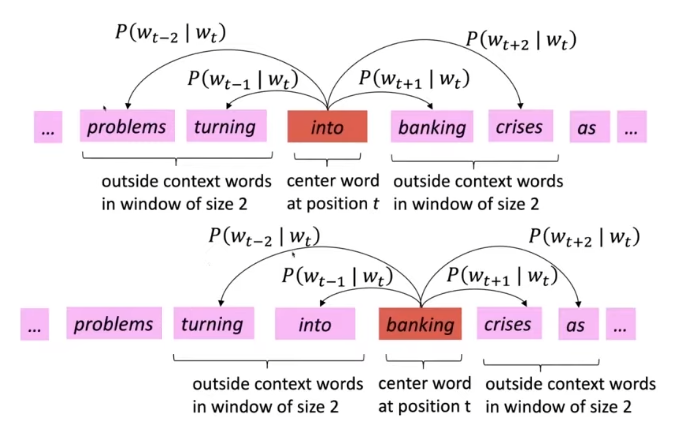

### Continuous Bag-of-Words and Continuous Skip-gram Models

Word2vec can utilize either of two model architectures to produce a distributed representation of words: continuous bag-of-words (CBOW) or continuous skip-gram. 
- In the continuous bag-of-words architecture, the model predicts the current word from a window of surrounding context words. The order of context words does not influence prediction (bag-of-words assumption). 
- In the continuous skip-gram architecture, the model uses the current word to predict the surrounding window of context words. The skip-gram architecture weighs nearby context words more heavily than more distant context words.

According to the authors' note, CBOW is faster while skip-gram performs better for infrequent words.

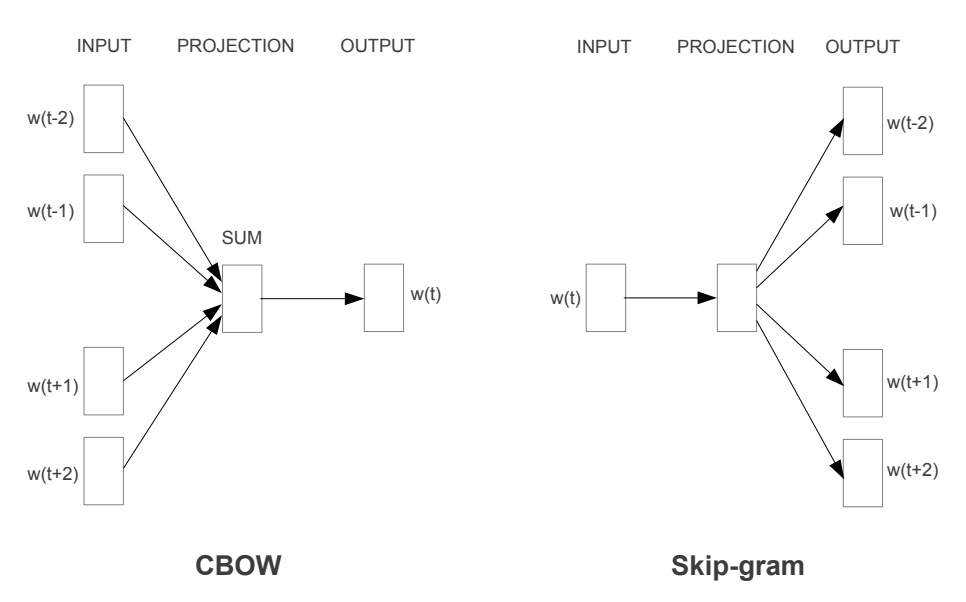

### Objective Function

For each position $t = 1, ..., T$, predict context words within a window of fixed size $m$, given by a centre word $w_i$. Thus, the aim is to maximize the corpus likelihood:

<center> <h4> $L(\theta)=\prod_{t=1}^{T}\prod_{-m \leq i \leq m |i \neq 0}P(w_{t+i}|w_t;\theta)$ </center> </h4>

The objective function then becomes the average negative log likelihood:

<center> <h4> $J(\theta) = - \frac{1}{T}\sum_{t=1}^{T}\sum_{-m \leq i \leq m | i \neq 0} logP(w_{t+i}|w_t;\theta)$ </center> </h4>

Minimizing the objective function is therefore equivalent to maximizing the predictive accuracy of the language model.


### Negative Sampling

- Softmax too expensive because of normalization.
- The intuition of word2vec efficiency is as follows: 
 - Treat the target word and a neighboring context word as positive examples. 
  - Randomly sample other words in the lexicon to get negative samples. 
  - Use logistic regression to train a classifier to distinguish those two cases. 
  - Use the learned weights as the embeddings.


## Tensorflow's Word2Vec Implementation

This [tutorial](www.tensorflow.org/tutorials/text/word2vec) from tensorflow is based on the following papers:
- Efficient estimation of word representations in vector space. 
- Distributed representations of words and phrases and their compositionality. 

It is not an exact implementation of the papers. Rather, it is intended to illustrate the key ideas.

## Gensim's Word2Vec Implementation

Gensim implements the [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) family of algorithms, using highly optimized C routines, data streaming and Pythonic interfaces. The word2vec algorithms include skip-gram and CBOW models, using either hierarchical softmax or negative sampling.

## Pretrained Word2Vec Model

In [ ]:
import gensim.downloader as gloader

In [ ]:
# Download the pretrained word2vec model
model_name = "word2vec-google-news-300"
word2vec_model = gloader.load(model_name)

In [ ]:
word2vec_model.similar_by_word("songs")

[('tunes', 0.8505028486251831),
 ('song', 0.8356553316116333),
 ('lyrics', 0.7509610652923584),
 ('Songs', 0.718195915222168),
 ('ballads', 0.7141437530517578),
 ('instrumentals', 0.7006202936172485),
 ('albums', 0.6982174515724182),
 ('melodies', 0.6899856328964233),
 ('album', 0.6723392009735107),
 ('original_compositions', 0.6697081923484802)]

In [ ]:
word2vec_model["songs"].shape

(300,)

## References

1. The Word2Vec Paper: [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781) 

2. The Neural Language Modelling Paper: [A Neural Probabilistic Language Model](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

3. Speech and Language Processing Textbook: [Vector Semantics and
Embeddings](https://web.stanford.edu/~jurafsky/slp3/)

4. Stanford CS224n: Natural Language Processing with Deep Learning: [Word Vectors](https://web.stanford.edu/class/cs224n/index.html#coursework)

5. Tensorflow's Word2Vec Tutorial: https://www.tensorflow.org/tutorials/text/word2vec

6. Gensim's Documentation: [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html)